In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import cv2
import numpy as np
import os

path = r'gender_age_emotion_dataset/UTKFace'

images = []  # List to store images
age = []     # List to store age labels
gender = []  # List to store gender labels

# Assuming 'path' is the directory containing your images
for image_name in os.listdir(path):
    if os.path.isfile(os.path.join(path, image_name)):  # Ensure only files are processed
        # Remove file extension
        image_name, ext = os.path.splitext(image_name)
        
        # Ensure file has a valid extension (e.g., .jpg)
        if ext != '.jpg':  
            continue
        
        # Check if the filename contains underscores
        if '_' not in image_name:
            print(f"Skipping file with unexpected format: {image_name}")
            continue
        
        # Try to extract and convert age and gender
        try:
            parts = image_name.split('_')
            ages = int(parts[0])  # Convert age to integer
            gender_value = int(parts[1])  # Convert gender to integer (0 or 1)
        except (IndexError, ValueError) as e:
            print(f"Skipping file with invalid data: {image_name} ({e})")
            continue
        
        # Load and preprocess the image
        image_path = os.path.join(path, image_name + ext)  # Add extension if needed
        image = cv2.imread(image_path)
        image = cv2.resize(image, (128, 128))  # Resize image to 128x128
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        # Append data to the lists
        images.append(image)
        age.append(ages)
        gender.append(gender_value)

# Convert lists to NumPy arrays only after collecting all data
images = np.array(images)
age = np.array(age)
gender = np.array(gender)

# Check the shapes of the arrays
print(f'Images shape: {images.shape}')
print(f'Age labels shape: {age.shape}')
print(f'Gender labels shape: {gender.shape}')


In [3]:
age = np.array(age, dtype = np.int64)
gender = np.array(gender, dtype = np.uint64)
images = np.array(images)

In [4]:
# Check if the variables are initialized properly
print(type(age))     # Should show <class 'list'>
print(type(gender))  # Should show <class 'list'>
print(type(images))  # Should show <class 'list'>




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(images, age, test_size = 0.2, random_state = 42)
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, test_size = 0.2, random_state = 42)

In [6]:
age_model = Sequential()

age_model.add(Input(shape = (128, 128, 3)))





age_model.add(Conv2D(128,(3,3), activation = 'relu'))
age_model.add(MaxPooling2D(2,2))

age_model.add(Conv2D(128,(3,3), activation = 'relu' ))
age_model.add(MaxPooling2D(2,2))

age_model.add(Conv2D(256,(3,3), activation = 'relu' ))
age_model.add(MaxPooling2D(2,2))

age_model.add(Conv2D(512,(3,3), activation = 'relu' ))
age_model.add(MaxPooling2D(2,2))



age_model.add(Flatten())
age_model.add(Dropout(0.2))

age_model.add(Dense(512, activation = 'relu'))


age_model.add(Dense(1, activation = 'linear'))


In [3]:
gender_model = Sequential()

gender_model.add(Input(shape = (128, 128, 3)))




gender_model.add(Conv2D(128,(3,3), activation = 'relu', ))
gender_model.add(MaxPooling2D(2,2))

gender_model.add(Conv2D(128,(3,3), activation = 'relu' ))
gender_model.add(MaxPooling2D(2,2))

gender_model.add(Conv2D(256,(3,3), activation = 'relu' ))
gender_model.add(MaxPooling2D(2,2))

gender_model.add(Conv2D(512,(3,3), activation = 'relu'))
gender_model.add(MaxPooling2D(2,2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))

gender_model.add(Dense(512, activation = 'relu'))





gender_model.add(Dense(1, activation = 'sigmoid'))

In [8]:
age_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [9]:
history_age = age_model.fit(X_train_age, y_train_age, validation_data = (X_test_age, y_test_age),  epochs = 50)

Epoch 1/50
593/593 [==============================] - 77s 111ms/step - loss: 12693.6592 - mae: 19.5097 - val_loss: 248.3952 - val_mae: 12.6235
Epoch 2/50
593/593 [==============================] - 81s 136ms/step - loss: 228.3859 - mae: 11.4253 - val_loss: 171.3943 - val_mae: 9.7248
Epoch 3/50
593/593 [==============================] - 81s 137ms/step - loss: 182.3594 - mae: 10.1156 - val_loss: 156.3750 - val_mae: 9.2810
Epoch 4/50
593/593 [==============================] - 80s 136ms/step - loss: 156.6834 - mae: 9.3364 - val_loss: 135.3141 - val_mae: 8.5515
Epoch 5/50
593/593 [==============================] - 80s 136ms/step - loss: 140.7148 - mae: 8.8628 - val_loss: 154.8476 - val_mae: 9.1480
Epoch 6/50
593/593 [==============================] - 80s 135ms/step - loss: 130.0287 - mae: 8.4895 - val_loss: 163.9264 - val_mae: 9.2084
Epoch 7/50
593/593 [==============================] - 80s 135ms/step - loss: 121.6732 - mae: 8.2029 - val_loss: 113.3701 - val_mae: 7.8224
Epoch 8/50
593/593 [=

In [10]:
age_model.save('age_model_new_1.h5')

In [4]:
from tensorflow.keras import backend as K
K.clear_session()


In [5]:
gender_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
history_gender = gender_model.fit(X_train_gender, y_train_gender, validation_data = (X_test_gender, y_test_gender),  epochs = 50)

Epoch 1/50
593/593 [==============================] - 71s 103ms/step - loss: 0.9542 - accuracy: 0.7502 - val_loss: 0.3642 - val_accuracy: 0.8380
Epoch 2/50
593/593 [==============================] - 59s 100ms/step - loss: 0.3572 - accuracy: 0.8373 - val_loss: 0.3329 - val_accuracy: 0.8530
Epoch 3/50
593/593 [==============================] - 58s 99ms/step - loss: 0.3264 - accuracy: 0.8553 - val_loss: 0.3065 - val_accuracy: 0.8646
Epoch 4/50
593/593 [==============================] - 59s 99ms/step - loss: 0.3117 - accuracy: 0.8593 - val_loss: 0.2818 - val_accuracy: 0.8747
Epoch 5/50
593/593 [==============================] - 58s 99ms/step - loss: 0.2934 - accuracy: 0.8692 - val_loss: 0.3125 - val_accuracy: 0.8581
Epoch 6/50
593/593 [==============================] - 59s 100ms/step - loss: 0.2873 - accuracy: 0.8753 - val_loss: 0.2951 - val_accuracy: 0.8730
Epoch 7/50
593/593 [==============================] - 59s 99ms/step - loss: 0.2756 - accuracy: 0.8796 - val_loss: 0.3075 - val_accura

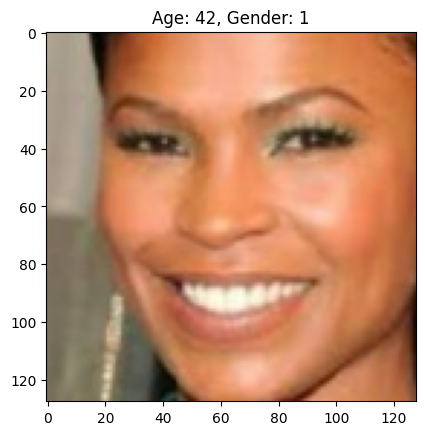

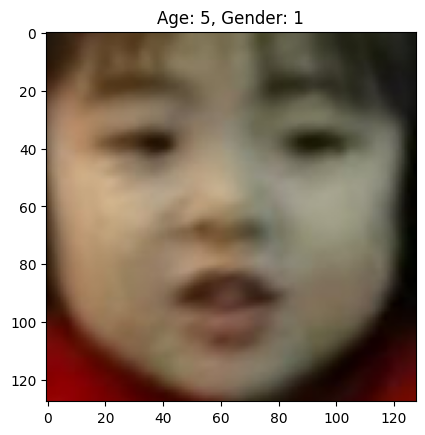

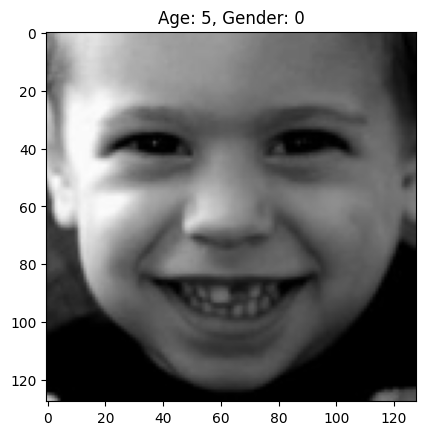

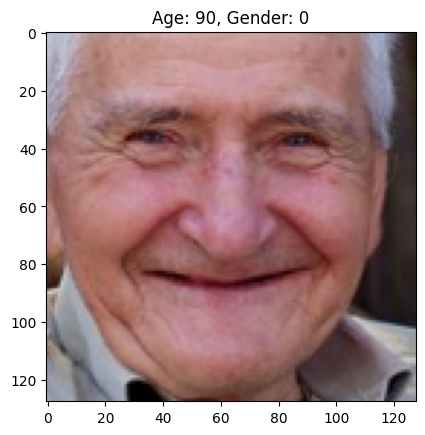

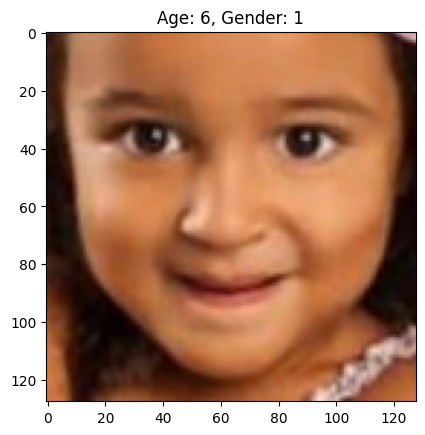

In [9]:




import numpy as np
import matplotlib.pyplot as plt

# Check some training labels
for i in range(5):
    idx = np.random.randint(0, len(y_train_age))
    plt.imshow(X_train_gender[idx])  # Show the image
    plt.title(f"Age: {y_train_age[idx]}, Gender: {y_train_gender[idx]}")
    plt.show()


In [10]:
gender_model.save('gender_model_new_1.h5')

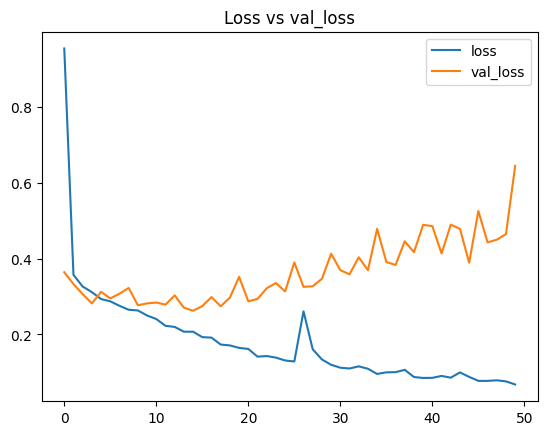

In [11]:
plt.plot(history_gender.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc = 'upper right')
plt.title('Loss vs val_loss')
plt.show()


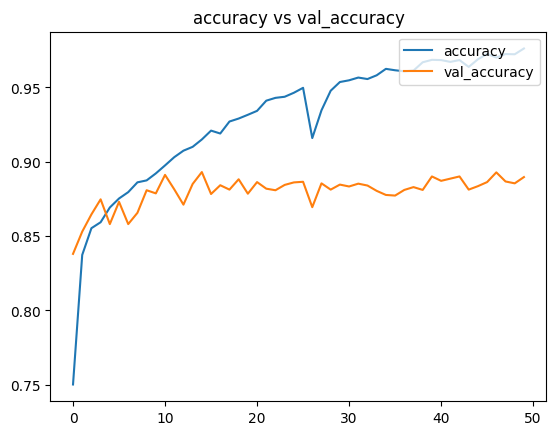

In [12]:
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc = 'upper right')
plt.title('accuracy vs val_accuracy')
plt.show()

In [13]:
import numpy as np

unique, counts = np.unique(y_train_gender, return_counts=True)
print("Train set distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test_gender, return_counts=True)
print("Test set distribution:", dict(zip(unique, counts)))


Train set distribution: {0: 9906, 1: 9060}
Test set distribution: {0: 2485, 1: 2257}


In [14]:
from sklearn.metrics import accuracy_score
predictions = gender_model.predict(X_test_gender)
y_pred = np.where(predictions > 0.5, 1, 0)


accuracy_score = accuracy_score(y_test_gender, y_pred)
print(f"Accuracy Score: {accuracy_score}")

Accuracy Score: 0.8897089835512442


In [15]:
from tensorflow.keras.models import load_model
age_model = load_model('age_model_new_1.h5')

In [16]:
from sklearn.metrics import mean_squared_error

age_predictions = age_model.predict(X_test_age)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test_age, age_predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 89.31408977805219


In [17]:
from sklearn.metrics import mean_absolute_error

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_age, age_predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 6.6815582643777995


In [ ]:
from tensorflow.keras.models import load_model
face_classifier=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
emotion_model = load_model('emotion_model_new_1.h5')
age_model = load_model('age_model_new_1.h5')
gender_model = load_model('gender_model_new_1.h5')

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
gender_labels = ['Male', 'Female']

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=emotion_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(128,128),interpolation=cv2.INTER_AREA)
        gender_predict = gender_model.predict(np.array(roi_color).reshape(-1,128,128,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]] 
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
        #Age
        age_predict = age_model.predict(np.array(roi_color).reshape(-1,128,128,3))
        age = round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        
   
    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test_age, age_predictions)
print(f"R² Score: {r2}")


In [ ]:
import tensorflow as tf
import numpy as np
age_model = load_model('age_model_new.h5')
gender_model = load_model('gender_model_new.h5')


# Prepare your input data (e.g., preprocess the image or data as required)
# For image classification:
image = tf.keras.preprocessing.image.load_img(r'D:\ML projects\male_pictures\gettyimages-1421578119-612x612.jpg', target_size=(128, 128))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Normalize if your model expects it
image_array = image_array / 255.0

# Make the prediction
predictions = age_model.predict(image_array)

# For a binary classification problem, you can interpret the prediction:
gender_prediction = "Female" if predictions[0] > 0.5 else "Male"

print("Predicted Gender:", gender_prediction)
